The following Notebook fits a RNN to recognize characters which are hand written in Hindi.

    Import the necessary modules:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Reshape, Flatten
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import datetime
import joblib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

    Set constants and paths that we might use:

In [2]:
TRAIN_DATA_DIR = '../Hindi-OCR/datasets/DevanagariHandwrittenCharacterDataset/Train/'
VALIDATION_DATA_DIR = '../Hindi-OCR/datasets/DevanagariHandwrittenCharacterDataset/Test/'
IMAGE_SIZE = (32, 32)
BATCH_SIZE = 64
NUM_CLASSES = 46

    Load the images using ImageDataGenerator:

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.1,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

    Let's preprocess the images and perform aug..:

In [4]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


    Let's set up directory for logs
    

In [5]:
log_dir = "../Hindi-OCR/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    Let's define the RNN architecture:

In [6]:

model = Sequential()
model.add(Reshape((32, 32), input_shape=(32, 32, 1)))
model.add(SimpleRNN(128, activation='relu'))
model.add(Flatten())
model.add(Dense(NUM_CLASSES, activation='softmax'))

    Congiure the RNN:

In [7]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20608     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 26542 (103.68 KB)
Trainable params: 26542 (103.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


    Fit the RNN:

In [8]:
history = model.fit(
    train_generator,  
    epochs=34,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
)

Epoch 1/34
1222/1222 [==============================] - 170s 139ms/step - loss: 2.3021 - accuracy: 0.3410 - val_loss: 1.5686 - val_accuracy: 0.5290
Epoch 2/34
1222/1222 [==============================] - 32s 26ms/step - loss: 1.3622 - accuracy: 0.5907 - val_loss: 1.0086 - val_accuracy: 0.6905
Epoch 3/34
1222/1222 [==============================] - 34s 27ms/step - loss: 1.1066 - accuracy: 0.6657 - val_loss: 0.8172 - val_accuracy: 0.7558
Epoch 4/34
1222/1222 [==============================] - 34s 28ms/step - loss: 0.9461 - accuracy: 0.7139 - val_loss: 0.7571 - val_accuracy: 0.7722
Epoch 5/34
1222/1222 [==============================] - 33s 27ms/step - loss: 0.8443 - accuracy: 0.7454 - val_loss: 0.6807 - val_accuracy: 0.7938
Epoch 6/34
1222/1222 [==============================] - 37s 30ms/step - loss: 0.7932 - accuracy: 0.7626 - val_loss: 0.7434 - val_accuracy: 0.7780
Epoch 7/34
1222/1222 [==============================] - 36s 30ms/step - loss: 0.7334 - accuracy: 0.7802 - val_loss: 0.6210

    Let's Visualize the RNN's performance:

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

    Training Vs Validation Accuracy:

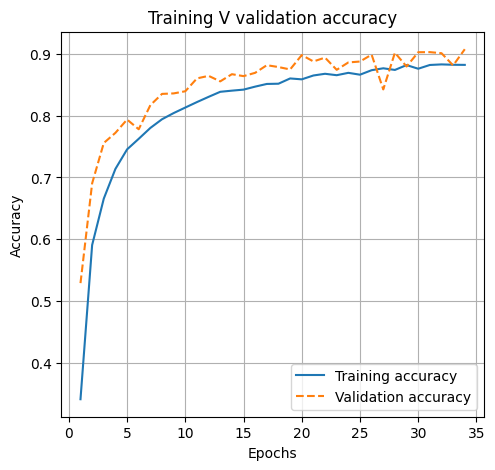

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, '--', label='Validation accuracy')
plt.title('Training V validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()


    Training Vs Validation Loss:

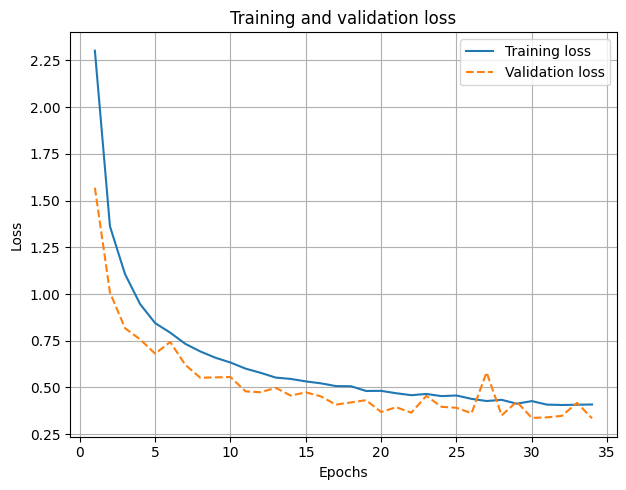

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

    Let's test the model with our samples:

1/1 [==============================] - 0s 119ms/step


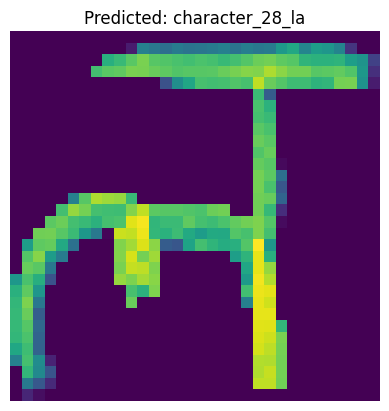

character_28_la


In [12]:


def predict_with_preprocessing(img_path, model):
    # Load the image
    img = image.load_img(img_path, target_size=(32, 32), color_mode="grayscale")
    img_array = image.img_to_array(img)
    
    # Expand the dimensions to match the shape the model expects
    img_array_reshaped = np.expand_dims(img_array, axis=0)
    
    # Normalize (if you've normalized the training data)
    img_array_normalized = img_array_reshaped / 255.0
    
    # Make a prediction
    predictions = model.predict(img_array_normalized)
    predicted_class = np.argmax(predictions[0])
    
    # Convert the label index to the corresponding Hindi letter
    class_labels = list(train_generator.class_indices.keys())
    plt.imshow(img_array)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()
    return class_labels[predicted_class]



result = predict_with_preprocessing("../Hindi-OCR/ManualTests/la_best.PNG", model)
print(result)


    Let's test the model with samples:

2/2 [==============================] - 0s 3ms/step


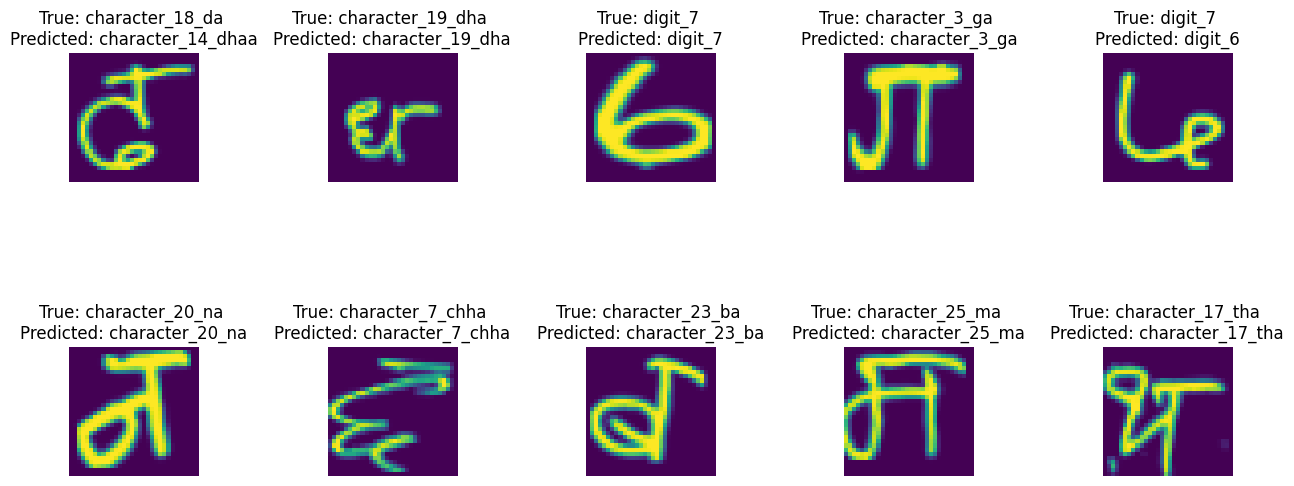

In [13]:
x_batch, y_batch = next(train_generator)
predictions = model.predict(x_batch)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(train_generator.class_indices.keys())
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(x_batch[i])
    axes[i].set_title(f"True: {class_labels[np.argmax(y_batch[i])]} \nPredicted: {class_labels[predicted_classes[i]]}")
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)


    Save the RNN:

In [15]:
joblib.dump(model, "../Hindi-OCR/Models/RNN.joblib")

['../Hindi-OCR/Models/RNN.joblib']